In [1]:
from image_loader import ImageLoader, ImagePreprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.svm import SVC
import numpy as np
from sklearn.metrics import accuracy_score, classification_report
import cv2
import matplotlib.pyplot as plt
from train_svm_model import deskew, load_images, learn, predict
from joblib import dump, load

In [2]:
img_size = (100, 100)
train_dir = "images/train/train"
test_dir = "images/test/test"
classes = {"cat": 0, "dog": 1}
SZ = img_size[0]

In [3]:
model = SVC(C=8.5, gamma=0.5)
clf = make_pipeline(StandardScaler(), PCA(n_components=2000), model)

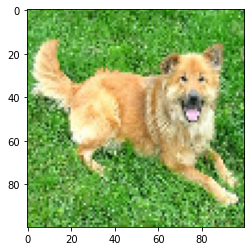

In [4]:
image_loader = ImageLoader(dir_name=test_dir)
test_img = image_loader.get_one_image(new_size=img_size, path="4.jpg")
test_img = cv2.cvtColor(test_img["data"], cv2.COLOR_BGR2RGB)
plt.imshow(test_img)

In [5]:
learn(1, 25000, clf, train_dir, img_size=img_size, classes=classes)

epoch: 0 	 Accuracy: 77.44


In [6]:
predict("4.jpg", clf, test_dir, new_size=img_size)

array([0])

In [7]:
dump(clf, "svm_classifier.joblib")

['svm_classifier.joblib']

In [8]:
clf2 = load("svm_classifier.joblib")

In [12]:
predict("62.jpg", clf2, test_dir, new_size=img_size)

array([0])

In [ ]:
for i in range(1, 25000):
    pred = predict("%i.jpg" % i, clf2, test_dir, new_size=img_size)
    if pred == 1:
        print(i, pred)
    